In [0]:
import pandas as pd
import numpy as np

In [0]:
df = pd.read_csv('train100.txt', delim_whitespace=True, header = None)
df_test = pd.read_csv('val.txt', delim_whitespace=True, header = None)

In [0]:
train_input = df[[0, 1]]
train_output = df[[2]]
test_input = df_test[[0, 1]]
test_output = df_test[[2]]
print("Train size : ", train_input.shape,"          ",train_output.shape)
train_input = train_input.to_numpy()
train_output = train_output.to_numpy()
test_input = test_input.to_numpy()
test_output = test_output.to_numpy()
train_size = train_input.shape[0]
test_size = test_input.shape[0]
print(train_input[:5,:])
print(train_output[:5,:])
print(train_size)
print(test_input[:5,:])
print(test_output[:5,:])
print(test_size)
train_output.shape

Train size :  (100, 2)            (100, 1)
[[10.  -7.2]
 [ 0.8 -8.4]
 [ 8.  -5.2]
 [-2.   3.2]
 [ 4.8  3.6]]
[[146.69 ]
 [ 14.204]
 [102.91 ]
 [ 17.204]
 [ 22.326]]
100
[[-0.8  3.2]
 [ 3.6  7.2]
 [-5.6  5.6]
 [-7.2  2.4]
 [10.   4. ]]
[[ 2.5632]
 [-2.5259]
 [43.55  ]
 [52.576 ]
 [90.903 ]]
300


(100, 1)

In [0]:
# Variables
m = train_size
hunits = [5, 3, 1]
W1 = np.random.randn(hunits[0], 2)
b1 = np.zeros(shape = (hunits[0], 1))
W2 = np.random.randn(hunits[1], hunits[0])
b2 = np.zeros(shape = (hunits[1], 1))
W3 = np.random.randn(hunits[2], hunits[1])
b3 = np.zeros(shape = (hunits[2], 1))
X = train_input.T
print(X[:,0])
# Dummy 
dW1_dummy = np.zeros(shape = (hunits[0], 2))
db1_dummy = np.zeros(shape = (hunits[0], 1))
dW2_dummy = np.zeros(shape = (hunits[1], hunits[0]))
db2_dummy = np.zeros(shape = (hunits[1], 1))
dW3_dummy = np.zeros(shape = (hunits[2], hunits[1]))
db3_dummy = np.zeros(shape = (hunits[2], 1))


[10.  -7.2]


In [0]:
print("W1 shape:", W1.shape)
print("b1.shape:", b1.shape)
print("W2.shape:", W2.shape)
print("b2.shape:", b2.shape)
print("W3.shape:", W3.shape)
print("b3.shape:",b3.shape)

W1 shape: (5, 2)
b1.shape: (5, 1)
W2.shape: (3, 5)
b2.shape: (3, 1)
W3.shape: (1, 3)
b3.shape: (1, 1)


In [0]:
# Forward prop
    # i = 5
noOfepochs = 10000
for epoch in range(noOfepochs):
  loss = 0
# for i in range(m):
  # x = X[:,i]
  # x = x.reshape(2,1)
  x = X
  Z1 = np.dot(W1,x)+b1
  A1 = np.tanh(Z1)
  # print("Z1:\n", Z1)
  # print("A1:\n",A1)
  Z2 = np.dot(W2, A1) + b2
  A2 = np.tanh(Z2)
  # print("Z2:\n", Z2)
  # print("A2:\n",A2)
  Z3 = np.dot(W3, A2) + b3
  A3 = Z3                                     #Linear Activation
  # print("Z3:\n", Z3)
  # print("A3:\n",A3)
  



  # Loss Function sum(-plogq)    
  L = (A3 - train_output.T )**2
  loss = np.sum(L)/(m)
  # print(L)

  # Back Propagation
  dA3 = (1/(2*m) )* (A3 - train_output.T )                # 2??
  dZ3 = dA3 
  # dW3 = np.dot(dZ3, A2.T) 
  # db3 = dZ3
  dW3 = 1/m * np.dot(dZ3, A2.T) 
  db3 = 1/m * np.sum(dZ3, axis = 1, keepdims= True)
  # print("dA3 : \n", dA3)
  # print("dZ3 : \n", dZ3)
  # print("dW3 : \n", dW3)
  # print("db3 : \n", db3)
  dA2 = np.dot(W3.T, dZ3)
  dZ2 = dA2 * (1- (np.tanh(Z2)**2))
  # dW2 = np.dot(dZ2, A1.T) 
  # db2 = dZ2
  dW2 = 1/m * np.dot(dZ2, A1.T) 
  db2 = 1/m * np.sum(dZ2, axis = 1, keepdims= True)
  # print("dA2 : \n", dA2)
  # print("dZ2 : \n", dZ2)
  # print("dW2 : \n", dW2)
  # print("db2 : \n", db2)
  dA1 = np.dot(W2.T, dZ2)
  dZ1 = dA1 * (1- (np.tanh(Z1)**2))
  # dW1 = np.dot(dZ1, x.T) 
  # db1 = dZ1
  dW1= 1/m * np.dot(dZ1, x.T) 
  db1 = 1/m * np.sum(dZ1, axis = 1, keepdims= True)
  # print("dA1 : \n", dA1)
  # print("dZ1 : \n", dZ1)
  # print("dW1 : \n", dW1)
  # print("db1 : \n", db1)

  # Generalised delta rule
  lr = 0.03
  alpha = 0
  W3 = W3 - lr* dW3 
  b3 = b3 - lr*db3 
  W2 = W2 - lr* dW2
  b2 = b2 - (lr*db2)
  W1 = W1 - lr* dW1 
  b1 = b1 - lr*db1 
  dW3_dummy = dW3.copy()
  db3_dummy = db3.copy()
  dW2_dummy = dW2.copy()
  db2_dummy = db2.copy()
  dW1_dummy = dW1.copy()
  db1_dummy = db1.copy()
  if( epoch % 100 == 0 ):
    print("Loss : \n", epoch,"       ", loss)
  if(epoch == noOfepochs -1):
    print("predicted o/p: \n", A3)

Loss : 
 0         2120.279934115382
Loss : 
 100         2021.480378659776
Loss : 
 200         1954.9662021777317
Loss : 
 300         1899.7704092045556
Loss : 
 400         1848.526573188787
Loss : 
 500         1802.0529613164056
Loss : 
 600         1759.9044225791554
Loss : 
 700         1720.5927553278234
Loss : 
 800         1684.0013893608243
Loss : 
 900         1649.2884205947964
Loss : 
 1000         1617.25518925378
Loss : 
 1100         1587.6785137125094
Loss : 
 1200         1560.3226905828071
Loss : 
 1300         1534.7382969572927
Loss : 
 1400         1509.1035619450915
Loss : 
 1500         1483.834868146822
Loss : 
 1600         1457.6760676377446
Loss : 
 1700         1405.4244822268201
Loss : 
 1800         1378.0610436685847
Loss : 
 1900         1356.3213648621593
Loss : 
 2000         1336.3921149847163
Loss : 
 2100         1317.8082018409093
Loss : 
 2200         1300.6222703596043
Loss : 
 2300         1284.2967801060418
Loss : 
 2400         1267.8971443

In [0]:
train_output[:,0]

array([146.69   ,  14.204  , 102.91   ,  17.204  ,  22.326  ,  28.824  ,
        74.805  ,   3.4459 ,  20.601  ,  47.161  ,   2.5886 ,  24.23   ,
        81.309  ,   6.3969 ,  12.402  ,  44.696  ,   6.7254 ,  32.985  ,
         2.2732 ,   5.9449 ,  63.529  ,  31.448  ,  60.52   ,   6.2695 ,
        49.531  , 126.22   ,   2.1116 ,   2.6464 ,   1.5658 ,  66.052  ,
        51.674  ,   5.9172 ,  60.255  ,   9.266  ,  66.333  ,   0.76767,
         5.3339 ,  17.289  ,  61.41   ,   0.47071,  95.631  ,  45.49   ,
        12.404  ,   9.8014 ,  68.271  ,   5.8228 ,  12.089  , 136.53   ,
         8.9228 ,   0.29693,  27.447  ,  -3.0853 ,   9.0744 ,  17.88   ,
         2.8716 ,  13.772  , 113.96   ,  23.556  ,  12.054  ,  33.718  ,
        54.528  ,  -3.8691 ,  39.095  ,  20.427  , -13.586  ,   8.765  ,
         3.7792 ,   3.9033 ,   8.6529 ,  41.857  ,   9.6737 ,  -1.0698 ,
        98.735  ,  74.025  ,  33.654  ,  59.062  ,  16.927  ,  27.136  ,
        43.446  ,  35.349  ,   2.079  ,   7.1978 , 

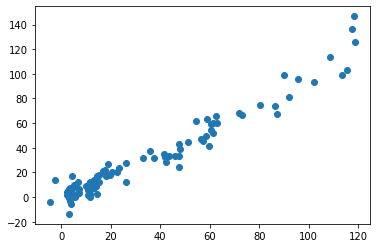

In [0]:
import matplotlib.pyplot as plt
plt.scatter(A3,train_output)

In [0]:
  loss = 0
# for i in range(m):
  # x = X[:,i]
  # x = x.reshape(2,1)
  x = test_input.T
  Z1 = np.dot(W1,x)+b1
  A1 = np.tanh(Z1)
  # print("Z1:\n", Z1)
  # print("A1:\n",A1)
  Z2 = np.dot(W2, A1) + b2
  A2 = np.tanh(Z2)
  # print("Z2:\n", Z2)
  # print("A2:\n",A2)
  Z3 = np.dot(W3, A2) + b3
  A3 = Z3                                     #Linear Activation
  # print("Z3:\n", Z3)
  # print("A3:\n",A3)
  



  # Loss Function MSE    
  L = (A3 - test_output.T )**2
  loss = np.sum(L)/(test_size)
  print("Validation loss : ", loss)
  print(A3)

Validation loss :  177.75979250508578
[[ 39.84218985  11.03541086  57.03390482  53.92257123  60.96105179
   14.10043152  52.81122385  21.52243803  28.39760249  49.7296775
   74.65358492  10.89018465  13.8141892  114.5221207    8.34537715
   90.13398624   3.88703167   8.99272378  15.07492246   4.66223402
   11.06942933   2.94030053   4.09809207  51.38972822  -0.61512368
    8.04127792  11.16660257  82.54755278  17.33704333   3.74103247
    8.00582104  10.90120127  24.4442427   41.08064557   7.74402685
   60.72748554  59.83104457  20.15291344  78.78402744  59.22958051
   29.68231722  40.0757673    8.03090317  -1.07053022  32.75389021
    2.66030659  -7.55596787  -5.10914486  63.13537931  21.50241634
   12.80413442  32.96204631  30.91195491  10.47546778  52.06688196
   34.30167312  89.3273553    2.82200695   0.99003369  25.38081971
    4.52064794  27.24731557   3.1553984   63.9179845  119.1198025
    5.02143948  26.15027376  19.01058906   5.10247139   7.66739274
   -0.19722009   2.6924334

In [0]:
test_output.T

array([[ 2.5632e+00, -2.5259e+00,  4.3550e+01,  5.2576e+01,  9.0903e+01,
         3.2935e+01,  4.6911e+01,  3.3709e+01,  4.9397e+01,  5.3426e+01,
         9.3561e+01,  8.4966e+00,  2.5544e+01,  1.1503e+02,  7.5443e+00,
         1.2439e+02, -2.1956e-01, -2.2816e+00,  1.8955e+01,  1.2772e+01,
         2.1000e+01,  1.2789e+01,  4.9871e+00,  1.3922e+01,  3.5794e+00,
         2.7994e+01,  7.0761e+00,  1.0067e+02,  3.7719e+01,  3.2241e+00,
         8.7969e+00,  2.1497e+00,  3.8608e+01,  4.2442e+01,  1.1868e+01,
         5.7428e+01,  5.7606e+01,  3.3010e+01,  9.0242e+01,  5.4921e+01,
         2.3689e+01,  4.4547e+01,  5.2925e+00,  1.1854e+01,  3.0789e+01,
         7.7446e+00,  7.3195e+00,  4.0881e+00,  6.3064e+01, -8.8355e+00,
         2.0059e+01,  3.3601e+01,  3.8603e+01,  4.3801e+00,  4.4627e+01,
         4.6725e+01,  8.5863e+01,  4.1953e+00,  2.0999e+01,  2.8478e+01,
         5.4623e+00,  9.4419e+00,  6.0962e+00,  7.5556e+01,  1.4270e+02,
        -8.4703e+00,  4.4742e+01,  1.2790e+01, -4.1